#### Importing necessary library packages

In [690]:
# Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [691]:
# Importing the necessary csv file into Python.
reviews = pd.read_csv("turtle_reviews.csv")

# Exploring the Data 

## Turtle_reviews.csv file

In [692]:
# Printing the first five rows of the reviews DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [443]:
# Printing the data types of the DataFrame.
print(reviews.dtypes)

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [444]:
# Printing the metadata of the DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


#### Comment:
- The data set consists of 2000 entires, and 11 columns.
- Looking at the metadata of the reviews DataFrame we can see that there are no missing values, as the output shows that for every column there are 2000 non-null counts. 

In [445]:
"""
The code shown below is just me doing an additional check to make sure that there is 
no missing data in the DataFrame.
"""

'\nThe code shown below is just me doing an additional check to make sure that there is \nno missing data in the DataFrame.\n'

In [446]:
# Creating a DataFrame which contains only the rows with missing data.
reviews_na = reviews[reviews.isna().any(axis=1)]
# Printing shape of the new dataframe, covid_cases_na.
print(reviews_na.shape)
# Printing the DataFrame.
reviews_na

(0, 11)


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary


#### Comment:
Supports observations from previous line of code - there are no missing values in this DataFrame.

In [447]:
# Summary of the descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [448]:
# Checking for duplicates using the duplicated() function.
# There are no columns which consist of unique data, so checking for duplicates using information from every column.
# Creating DataFrame called reviews_duplicates so that only the duplicated information prints.
reviews_duplicates = reviews[reviews.duplicated()]
reviews_duplicates

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary


#### Observations:
- No duplicates. 

### Initial analysis for age, spending_score, remuneration, and loyalty_points

Aim: To get a general understanding of the customers in Turtle Games, their age, and remuneration, as well as how generally the spending_score and loyalty_points are spread.

##### Boxplot for age

<AxesSubplot:xlabel='age'>

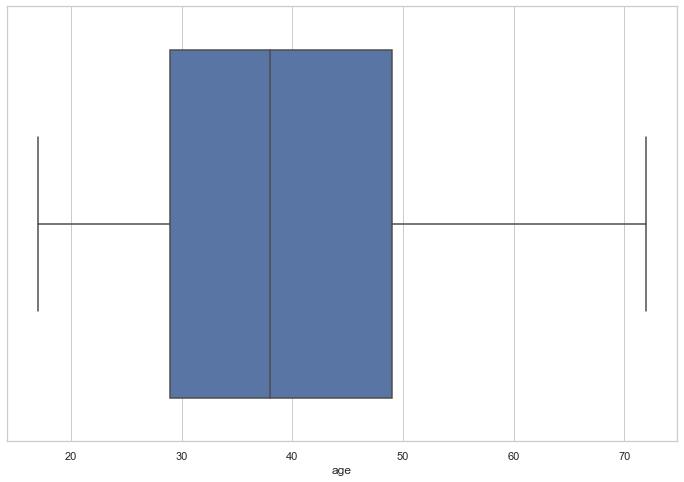

In [592]:
# boxplot for age.
sns.set_style("whitegrid")
  
sns.boxplot(x = 'age', data = reviews)

#### Comment:
Data appears to be slightly skewed to the right. This implies that most of the age group of the customers of Turle Group are around 50 years or lower. With there being less scattering of various age groups beyond that.

##### Countplot for age

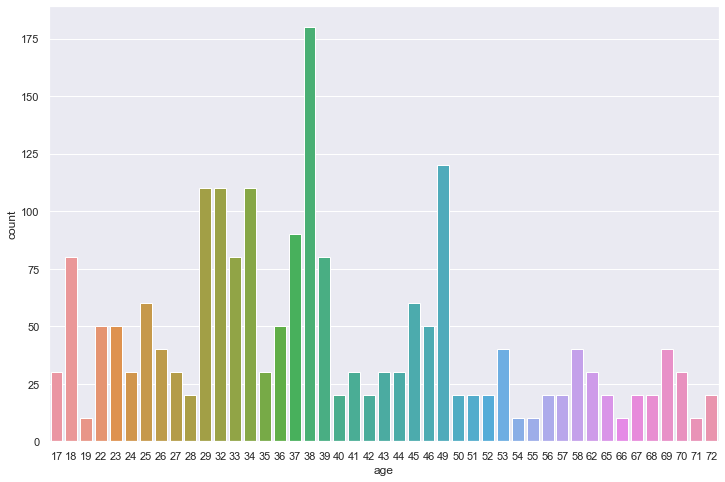

In [593]:
sns.set(style="darkgrid")
ax = sns.countplot(x="age", data=reviews)

#### Comment:
- Modal age = 38 years.
- Which is then followed by 49 years, and 29, 32, 34 years.
- Noticeably smallest age group count are: 19 years, 54 years, 55 years, 66 years and 71 years.

##### Boxplot for spending_score

<AxesSubplot:xlabel='spending_score (1-100)'>

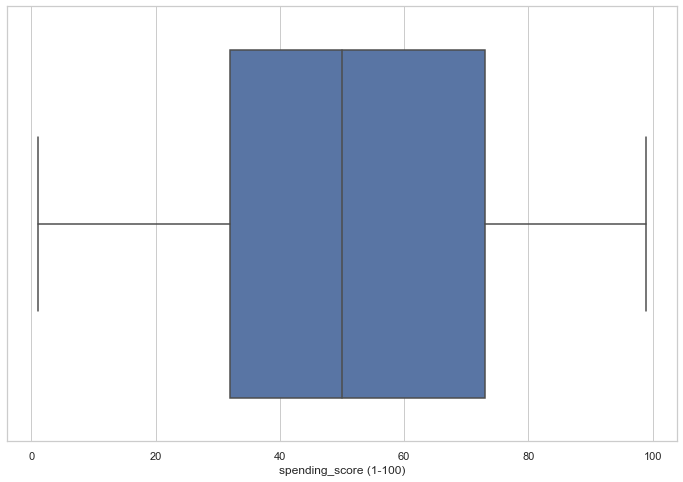

In [595]:
# boxplot for spending_score.
sns.set_style("whitegrid")
  
sns.boxplot(x = 'spending_score (1-100)', data = reviews)

#### Comment:
Data is ever so slightly positively skewed (skewed to the right). Mean > Median. More customers' spending score is relatively less than more.

##### Countplot for spending_score

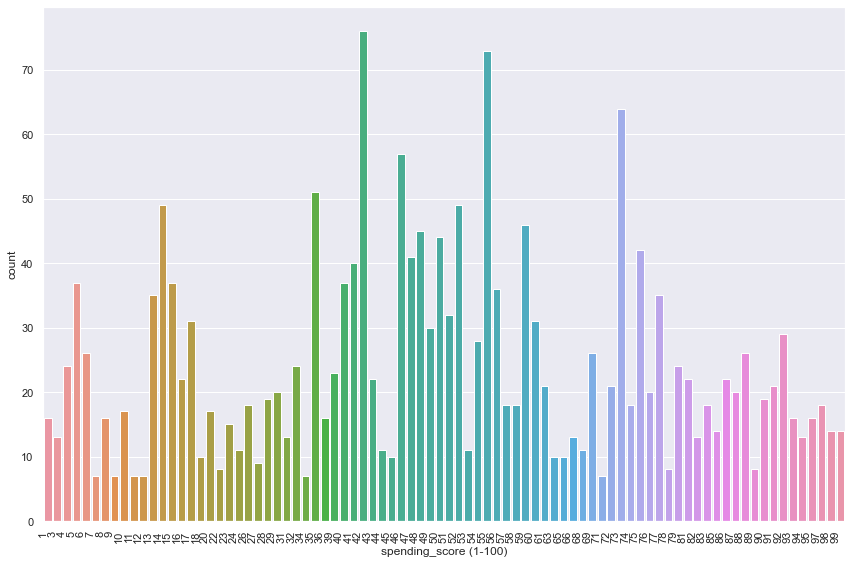

In [605]:
sns.set(style="darkgrid")
ax = sns.countplot(x='spending_score (1-100)', data=reviews)

# Code to rotate x labels 90 degrees so that count plot is easier to read.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### Comment:
- Modal spending_score = 43.
- This is followed closely by spending scores, 56 and 74.
- The counter plot supports the slight right skew as we can see there being more people in the lower regions of this chart than the upper region of this chart.

##### Boxplot for remuneration

<AxesSubplot:xlabel='remuneration (k£)'>

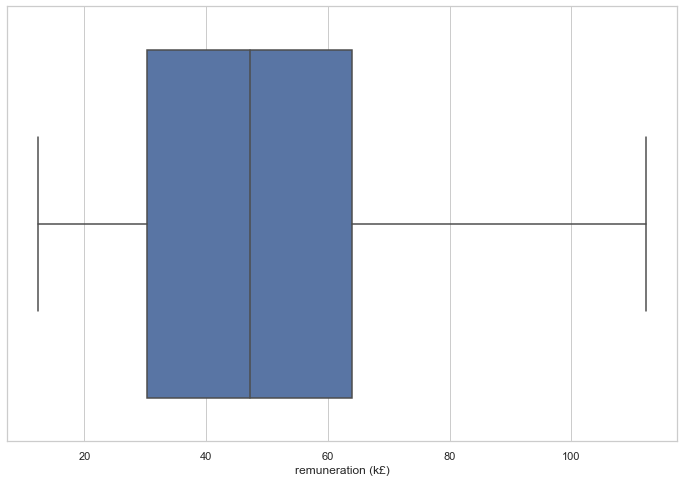

In [606]:
# boxplot for remuneration.
sns.set_style("whitegrid")
  
sns.boxplot(x = 'remuneration (k£)', data = reviews)

#### Comment:
Data is not skewed, and Mean=Median.

##### Countplot for remuneration

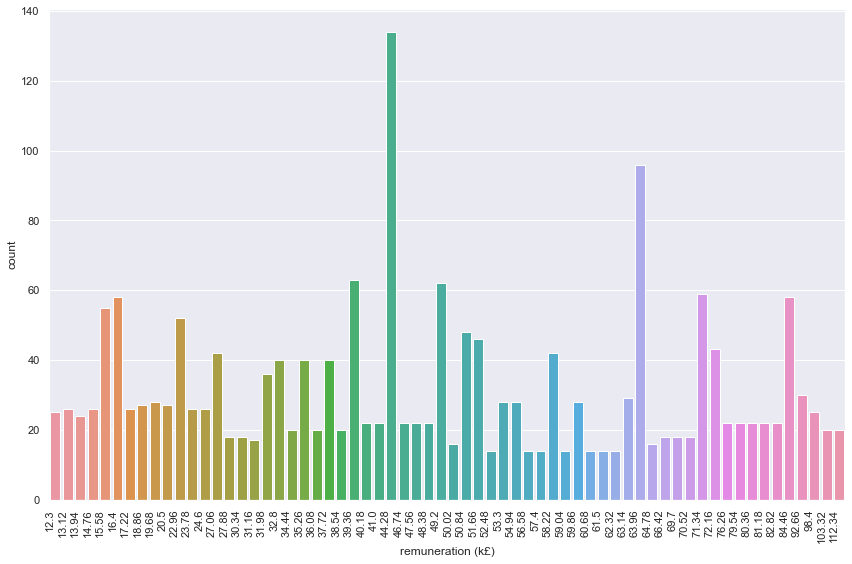

In [610]:
sns.set(style="darkgrid")
ax = sns.countplot(x='remuneration (k£)', data=reviews)

# Code to rotate x labels 90 degrees so that count plot is easier to read.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()
plt.show()


#### Comment:
- modal remuneration = 44.28k - 46.74k.
- second mode would be between 63.96k to 64.78k.
- data of the count for remuneration appears to be evenly spread, supporting the analysis on the boxplot above.

##### Boxplot for loyalty_points

<AxesSubplot:xlabel='loyalty_points'>

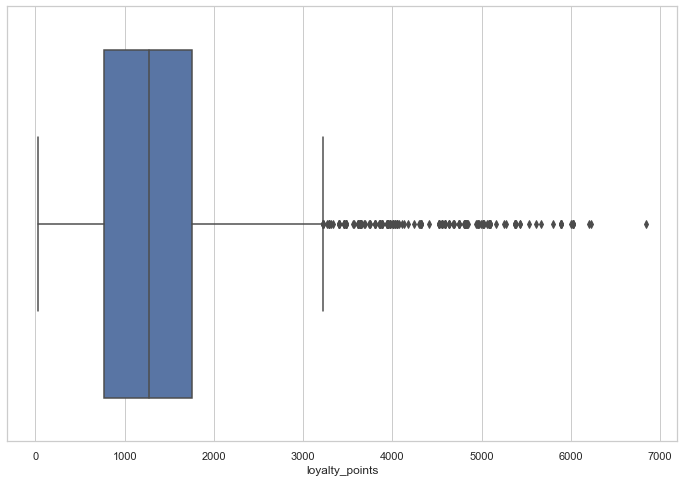

In [452]:
# boxplot for loyalty points.
sns.set_style("whitegrid")
  
sns.boxplot(x = 'loyalty_points', data = reviews)

#### Comment:
Box plot indicates loyalty_points is symmetric, despite:
Mean = 1578.032000 > Median = 1276.000000. 
However, this may be a result of there being a lot of outliers, as mean is affected by outliers. Outliers indicate that there are many data points that are significantly further away from all the other observations.

### Dropping redundant columns

In [614]:
# Removing language and platform column from DataFrame.
reviews_df = reviews.drop(columns=['language', 'platform'])

# Checking columns to ensure the columns have indeed been removed.
reviews_df.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

### Changing column headings

In [615]:
# Renaming columns for easier referencing using .rename() function.
reviews_df = reviews_df.rename(columns={'remuneration (k£)': 'remuneration', 
                                        'spending_score (1-100)': 'spending_score'})

# Viewing the renamed columns, displaying only the column names.
reviews_df.head(0)

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary


### Saving DataFrame as csv, and analysing

In [616]:
# Checking for the current file directory.
import os
os.getcwd()

'/Users/maduraakannan/Turtle_Games_Project'

In [617]:
# Savind reviews_df DataFrame into a csv file called, 'reviews_new'.
reviews_df.to_csv('reviews_new.csv', index=False)

In [618]:
# Importing previously saved csv file into new DataFrame called 'reviews_df2'.
# As it is the second version of original 'reviews_df'.
reviews_df2 = pd.read_csv('reviews_new.csv')
# Printing first 2 rows of DataFrame.
reviews_df2.head(2)

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.3,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.3,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...


In [619]:
# Sense-checking using shape and metadata information.
print(reviews_df2.shape)
print(reviews_df2.info())

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


#### Comments:
- New csv file has only 9 columns (as 2 columns were made redundant in a previous step).
- New names, 'renumeration' and 'spending_score', have been successfully integrated.

## Regression Analysis on turtle_reviews data

Here, I will be using linear regression or multiple linear regression and the statsmodels functions to evaluate possible linear relationships between loyalty points and age/remuneration/spending scores to determine whether they can be used to predict the loyalty points, and indicate how users accumulate loyalty points.

### Age vs Loyalty points

In [459]:
# Function to work out the slope coefficient, m, and the intercept, c.
# Using the mathematical equations for this.
def estimate_coef(x, y):
    # Specify the size or number of points.
    n = np.size(x)  

    # Calculate the mean of x and y.
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate the cross-deviation and deviation around x.
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x

    # Calculate the regression coefficients.
    m = SS_xy / SS_xx
    c = mean_y - m*mean_x

    return (c, m)

In [460]:
# Function which plots the scatter diagram, along with the best fit line so we can perform the regression analysis.
def plot_regression_line(x, y, c):
    # Use scatterplot to plot the actual points.
    plt.scatter(x, y, color = "b",
               marker = "o", s = 30)
 
    # Set the predicted response vector using the linear equation.
    y_pred = c[0] + c[1]*x
 
    #  Plot the regression line (in red).
    plt.plot(x, y_pred, color = "black")
 
    # Add two labels for clarity.
    plt.xlabel('Age')
    plt.ylabel('loyalty_points')
    plt.title('Age vs loyalty_points', size=14)
 
    # Set a function to display the plot.
    plt.show()

Estimated coefficients:
c = 1736.517739399062            
m = -4.012805149995246


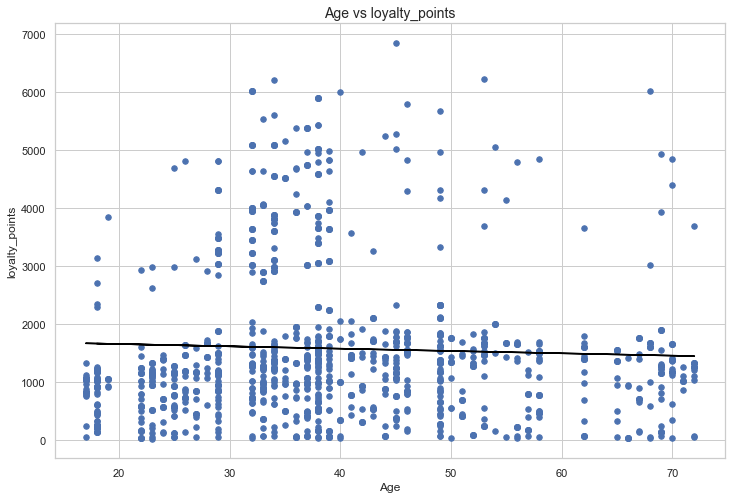

In [461]:
# Linear regression analysis on relationships between loyalty points and age.
def main():
    # Defining the independent variable.
    x = reviews_df2[['age']].to_numpy()
    # Defining the dependent variable.
    y = reviews_df2[['loyalty_points']].to_numpy()
    
    # Calculate the coefficients.
    c = estimate_coef(x, y)
    print("Estimated coefficients:\nc = {}  \
          \nm = {}".format(c[0], c[1]))
    
    # Plot the regression line (i.e. y = mx + c).
    plot_regression_line(x, y, c)
 
main()

    

In [462]:
# Define the dependent variable.
y = reviews_df2['loyalty_points'] 

# Define the independent variable.
x = reviews_df2['age'] 

# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_df2).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 22 Sep 2022   Prob (F-statistic):             0.0577
Time:                        13:12:39   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [463]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


#### Observations:
- The regression line shows that the relationship between age and loyalty_points is negatively correlated.
    - The slight negative correlation maybe due to Turtle Games having a positively skewed age group, so naturally there will be less data to work with for the older age group.
    - The regression line only considers the loyalty_points <= 2000, so much of the data is ignored.

- From looking at the scatter diagram and the regression line, it is clear that the model is underfitted. This indicates a problem of high bias which leads to large errors.

- The R-squared value, which explains the goodness of fit, is 0.002, which also indicates that the regression model is not a great fit.

- P-value = 5.8% > 5%, hence also indicating that the relationship between age and loyalty_points is not statistically significant.

- Skew = 1.449 > +1. This indicates that this data has a substantially skewed distribution. (https://www.smartpls.com/documentation/functionalities/excess-kurtosis-and-skewness/)

- Kurtosis = 4.688 > +1. This suggests that the distribution is too peaked. (https://www.smartpls.com/documentation/functionalities/excess-kurtosis-and-skewness/)

#### Key Takeaway:
This model shows that there is no linear relationship between age and loyalty_points. This model with age as the dependent variable is not a good fit, and thus cannot be used to predict loyalty_points.    

### Spending_score vs Loyalty_points

In [620]:
# Define the dependent variable.
y = reviews_df2['loyalty_points'] 

# Define the independent variable.
x = reviews_df2['spending_score'] 

In [621]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_df2).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        14:24:26   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [622]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


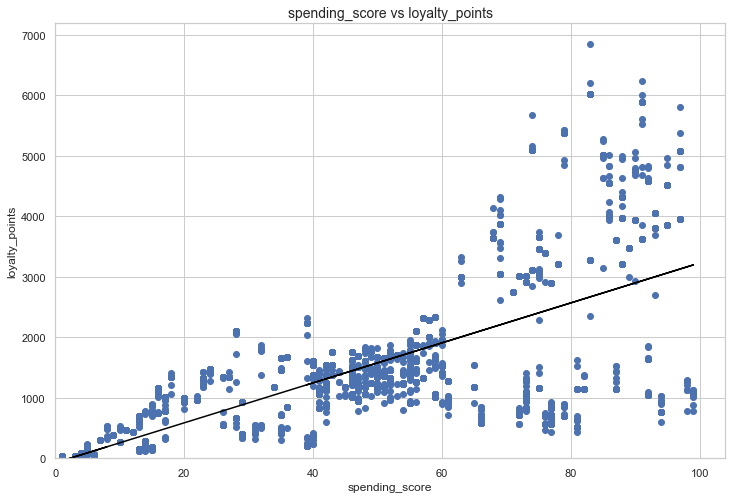

In [471]:
# Set the the x coefficient to 33.061693 and the constant to -75.052663 to generate the regression table.
y_pred = 33.061693 * reviews_df2['spending_score'] - 75.052663
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(0)
plt.ylim(0)

plt.xlabel('spending_score')
plt.ylabel('loyalty_points')
plt.title('spending_score vs loyalty_points', size=14)

plt.show()


#### Observations:
- There is a strong positive correlation between spending_score and loyalty_points. This is indicated by the parameters which show that m = 33.0617. This means that the larger the spending_score of the customers, the higher the loyalty_points of the customers.

- R-squared value is equal to 0.452, which indicates that this model is a great fit. Any study which attempts to predict human behaviour will tend to have R-squared value less than 50% (https://statisticsbyjim.com/regression/how-high-r-squared/).

- Additionally, p-value = 2.92e-263 < 0.05. Therefore this relationship is statisticallly significant, and shows that changes in spending_score are associated with changes in the loyalty_points of the customers.

- The probability of the t-value, which tests whether the hypothesis of the slope is significant or not equals  0. Hence also showing that the estimated slope is significant.

- The confidence interval of the true x coefficient is between (31.464, 34.659). This means that 95 out of a 100 samples, for instane, will derive a slope that is within this interval.

- 0 < Skew = 0.422 < +1. This suggests that the distribution is approximately symmetric. (https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241).

- Kurtosis = 4.554. This tells us that the curve is has a sharp central peak.

#### Key Takeaway:
This model shows that there is a strong linear relationship between spending_score and loyalty_points. This model with spending_score as the dependent variable is a good fit, and can be used to predict loyalty_points. 

### Remuneration vs Loyalty_points

In [472]:
# Define the dependent variable.
y = reviews_df2['loyalty_points'] 

# Define the independent variable.
x = reviews_df2['remuneration'] 

In [473]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_df2).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        14:58:28   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [474]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


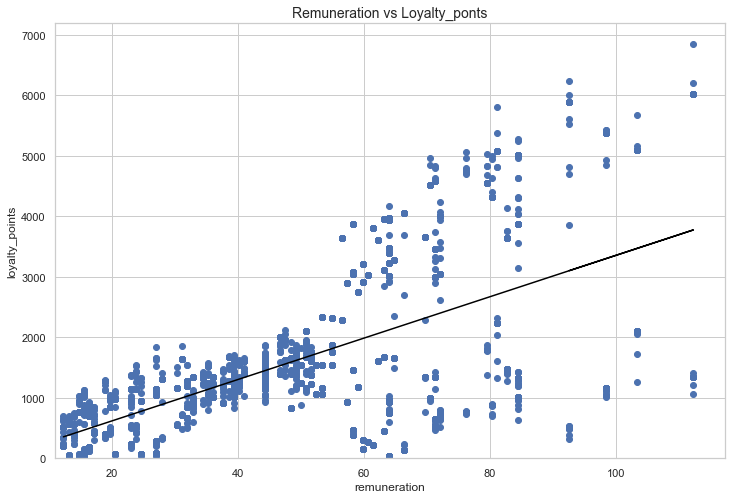

In [475]:
# Set the the x coefficient to 34.187825 and the constant to -65.686513 to generate the regression table.
y_pred = 34.187825 * reviews_df2['remuneration'] - 65.686513
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.xlim(11)
plt.ylim(0)

plt.xlabel('remuneration')
plt.ylabel('loyalty_points')
plt.title('Remuneration vs Loyalty_ponts', size=14)

plt.show()


#### Observations:
- This model shows that there is a positive correlation between remuneration and loyalty_points, as indicated by the coefficient of x (the slope), which equals 34.187825. So, the larger the remuneration, the higher the loyalty_points.
- R-squared value is equal to 0.380. This indicates that it is an acceptable model. Although the model can be better, this model can be used to indicate the relationship between remuneration and loyalty_points.
- The p-value = 2.43e-209 < 0.05, which indicates that the p-value is significant. The p-value measures the probability that the observed difference could have happened by chance.
- The probability of the t-value here is equal to 0. This shows that the estimated slope is significant.
- The confidence interval of the true x coefficient is between (32.270, 36.106). 
- Skew = 0.089. This implies the shape of this probability distribution is symmetric, especially as it's considerably close to 0. (https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241)
- Kurtosis = 3.590, which again just suggests a high peak.

#### Key Takeaway:
This model shows that there is a positive linear relationship between spending_score and loyalty_points. This model with remuneration as the dependent variable is a good fit, and can be used to predict loyalty_points sufficiently. 

### Final insights and observations

- Spending_score and Remuneration have a linear relationship with loyalty_points:
    - The higher the customers remuneration, the higher the loyalty_points of the customers.
    - The larger the spending_score of the customer, the higher the loyalty_points of the customers.
- Remuneration has a slightly stronger positive correlation with loyalty_points than spending_score.
- Age, however, has no linear relationship with loyalty_points and does not indicate what the loyalty_points of a customer would be.

# Clustering with *k*-means using Python

In [623]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [624]:
# Loading csv file as df2.
df2 = pd.read_csv('reviews_new.csv')

# Viewing first two rows of new DataFrame.
df2.head(2)

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.3,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.3,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...


In [625]:
# df2 DataFrame containing only remuneration and spending_score columns.
df2 = df2[['remuneration', 'spending_score']]

df2.head()


,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


#### Exploring DataFrame

In [626]:
# Exploring the data.
df2.shape
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


#### Plotting remuneration vs spending score

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

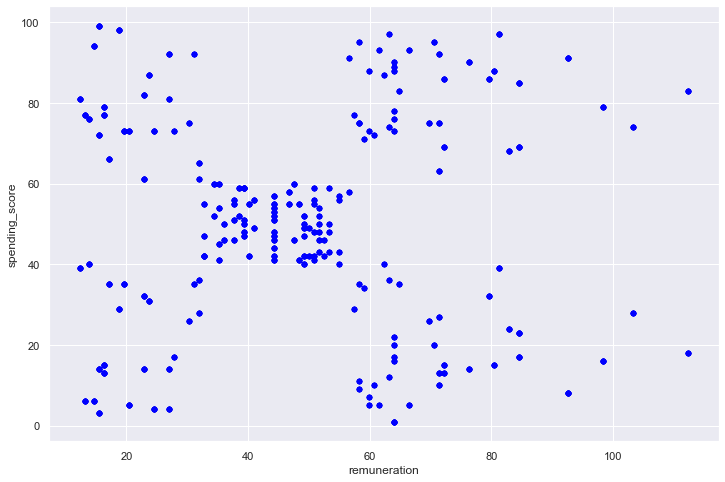

In [627]:
# to determine any correlations and possible groups (clusters)

# Scatter plot for remuneration vs spending_score.
df2.plot.scatter(x='remuneration', y='spending_score', c = ['blue'])

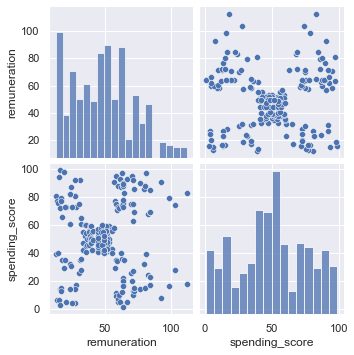

In [628]:
# Pairplot for remuneration vs spending_score.
sns.pairplot(df2)

#### Comment:
On initial glance, it appears as though there are at least 5 cluster groups.

#### Silhouette and Elbow methods 

In [629]:
# To determine optimal number of clusters for k-means clustering.

<function matplotlib.pyplot.show(close=None, block=None)>

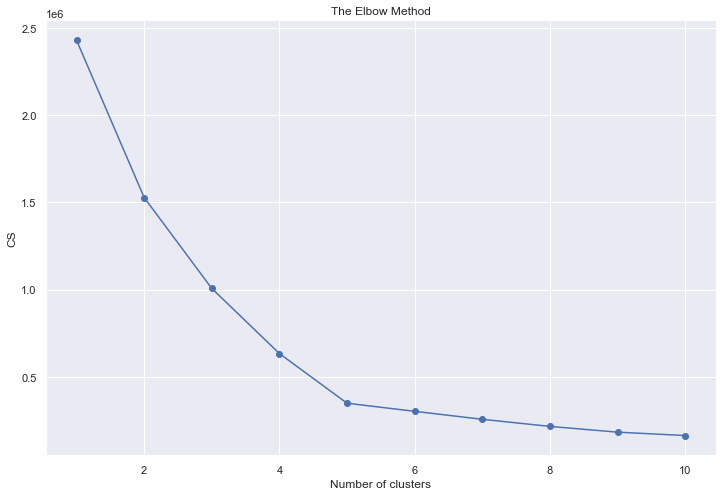

In [630]:
# Elbow chart to determine optimal number of clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df2)
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show

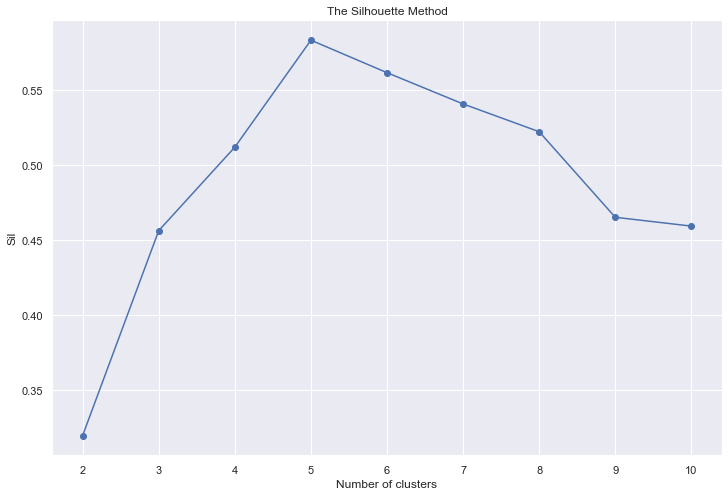

In [631]:
# Silhouette method for optimal number of clusters.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2, labels, metric = 'euclidean'))
    
# Plot the silhoutte method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

##### Observations:
- According to the models, the optimal number of clusters will be 5.
- I will be testing this out using three values for *k* based on insights from Elbow and Silhouette methods.
- I will be using k=4, k=5, and k=6.

### Evaluating usefulness of three values for *k* 

This will be evaluated based on the insights from Elbow and Silhouette methods.

#### k=4

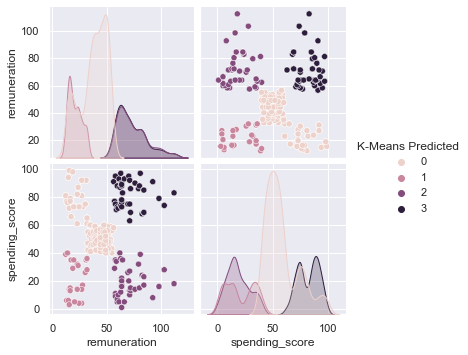

In [632]:
# Using k=4:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, hue='K-Means Predicted', diag_kind='kde')

In [633]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

In [634]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  0
2         13.12               6                  1
3         13.12              77                  0
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

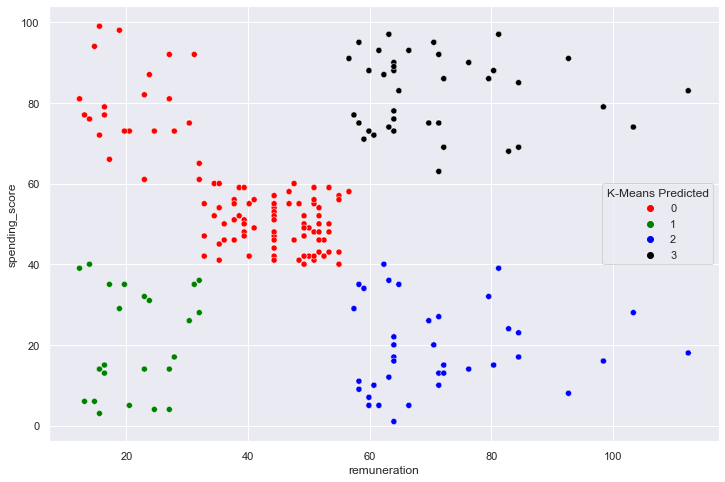

In [635]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize': (12, 8)})

sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2, hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

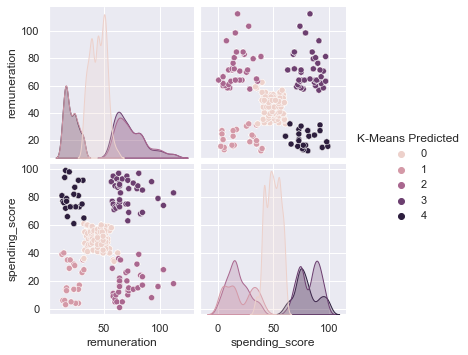

In [636]:
# Using k=5:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, hue='K-Means Predicted', diag_kind='kde')

In [637]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

In [638]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

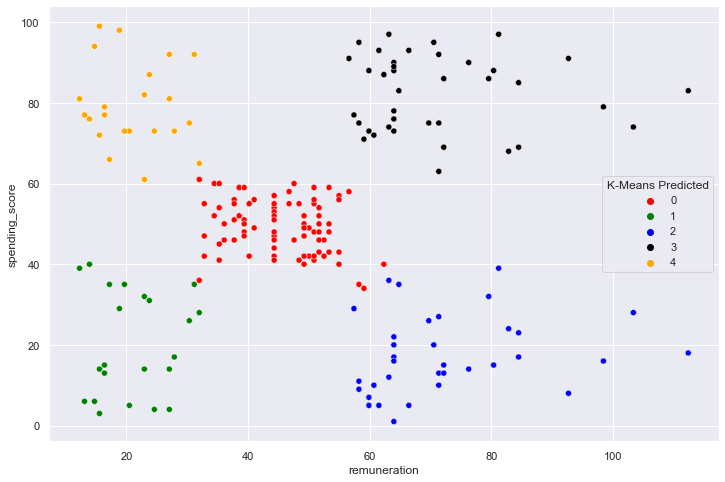

In [639]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize': (12, 8)})

sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2, hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

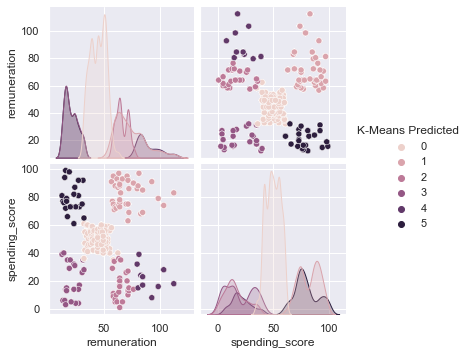

In [640]:
# Using k=6:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, hue='K-Means Predicted', diag_kind='kde')

In [641]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

In [642]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

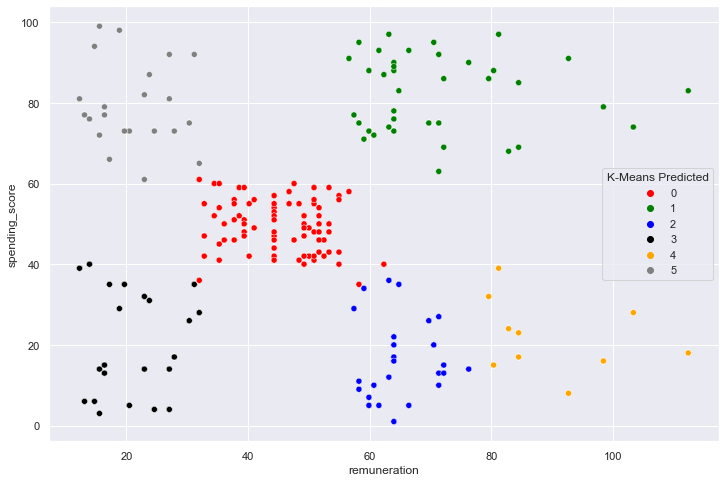

In [643]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize': (12, 8)})

sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2, hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'grey'])

#### Final Model

- The final model will use k = 5. The main reason being that both the Elbow and Silhouette methods show that the optimal value for k is 5.
- k=4 seems like too few a clusters which caused two clusters to become part of a larger cluster. 
- k=6 has too many clusters which creates artificial boundaries within real data clusters (https://zerowithdot.com/mistakes-with-k-means-clustering/). 
- Having both too few a clusters, and too large a clusters will result in inaccurate analysis of the provided data. 

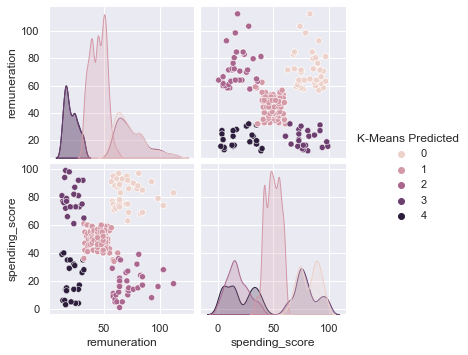

In [644]:
# Using k=5:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(df2)
clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2, hue='K-Means Predicted', diag_kind='kde')

In [645]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

In [646]:
# View the K-Means predicted.
print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


[Text(0.5, 1.0, 'Cluster k=5')]

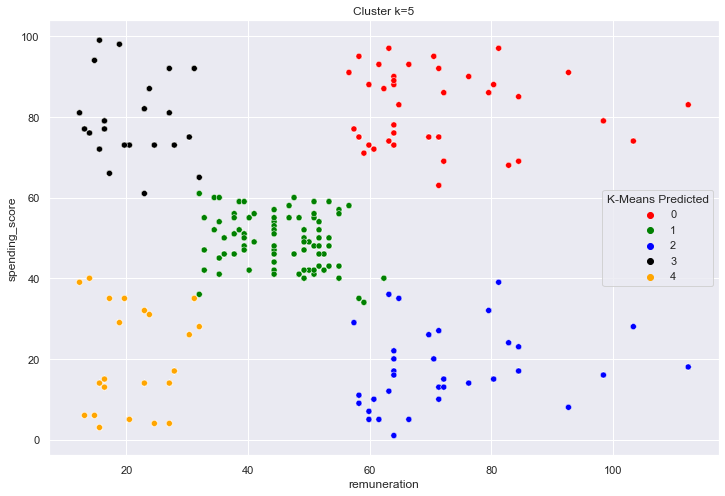

In [689]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize': (12, 8)})

sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df2, hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange']).set(title='Cluster k=5')

#### Observations:
- Cluster 1 (green) has the most amount of observations. This implies that majority of the customers of Turtle Games belong to cluster 1. The total income per these customers per year is roughly between £30K to £55K, and they have a spending score roughly between 40 to 60.
- Since the rest of the clusters are more scattered, I have combined the clusters according to spending_scores. So:
    - Clusters 3 (black) and 0 (red) combine to give us the groups with the highest spending_score. Combined, they become the second most popular group with the number of observations per predicted class being equal to 625.
        - This group have a high spending_score, which could be even more maximised by targeting this group for marketing campaigns.
    - We are finally followed by group 4 (yellow) and 2 (blue) who have the lowest spending_score in comparison to the others. Combined, these are the least popular group with the number of observations per predicted class being equal to 601.
        - This group have similar remuneration to cluster 3 and 0. Therefore, questions to consider may be - why does this group not have as high a spending_score as the other clusters? Is it due to marketing issues? Is it because of their location? Is Turtle Games less popular there? 

##### Extra analysis to get an understanding of the outliers and clustering

This part of the analysis was just completed for me to get a better understanding of why I chose to go for a certain mean over another, and to get a better understanding of my analysis above.

##### k=5

In [648]:
kmean = KMeans(n_clusters=5)
m = kmean.fit(df2)

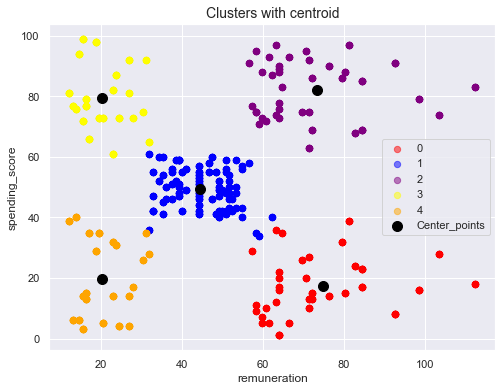

In [649]:
# Plotting clusters with centroid to aid in spotting outliers.
colour=['red', 'blue', 'purple', 'yellow', 'orange', 'grey']
plt.figure(figsize=(8,6))
for i in range(np.max(m.labels_)+1):
    plt.scatter(df2[m.labels_==i].remuneration, df2[m.labels_==i].spending_score, label=i, c=colour[i], alpha=0.5, s=40)
plt.scatter(m.cluster_centers_[:,0], m.cluster_centers_[:,1], label='Center_points', c='black', s=100)

plt.xlabel('remuneration')
plt.ylabel('spending_score')
plt.title('Clusters with centroid', size=14)
plt.legend()
plt.show()

##### k=6

In [650]:
kmean = KMeans(n_clusters=6)
m = kmean.fit(df2)

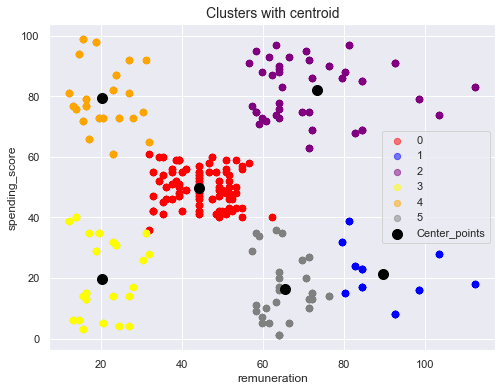

In [651]:
# Plotting clusters with centroid to aid in spotting outliers.
colour=['red', 'blue', 'purple', 'yellow', 'orange', 'grey']
plt.figure(figsize=(8,6))
for i in range(np.max(m.labels_)+1):
    plt.scatter(df2[m.labels_==i].remuneration, df2[m.labels_==i].spending_score, label=i, c=colour[i], alpha=0.5, s=40)
plt.scatter(m.cluster_centers_[:,0], m.cluster_centers_[:,1], label='Center_points', c='black', s=100)

plt.xlabel('remuneration')
plt.ylabel('spending_score')
plt.title('Clusters with centroid', size=14)
plt.legend()
plt.show()

#### Comment: 
Validates the idea of there being too many clusters when K=6.

# Analysing customer sentiments with reviews

In [652]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

#Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maduraakannan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maduraakannan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [653]:
# Importing CSV file.
df3 = pd.read_csv('reviews_new.csv')

# Sense-checking the DataFrame.
df3.shape
print(df3.columns)
df3.info()

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [654]:
# Creating a new DataFrame with the same name that only contains
# review and summary columns.
df3 = df3[['review', 'summary']]

# Printing first 5 columns of new DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [655]:
# Checking the metadata on this new DataFrame.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [656]:
# Although the .info() shows there is no missing values, checking again.
df3.isnull().sum()

review     0
summary    0
dtype: int64

Shows that there are no missing values.

### Preparing data for NLP

In [657]:
# Changing data in review and summary column to lower case and 
# joining with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [658]:
# Viewing output of review column.
print(df3['review'].head())
print(df3['summary'].head())

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object
0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object


In [659]:
# Function to remove punctuations from the data.
def punctuation_removal(data):
    # string.punctuation gives all sets of punctuation.
    for punctuation in string.punctuation:
        # replacing punctuation with a blank.
        data = data.replace(punctuation, '')
    return data

In [660]:
# Applying 'punctuation_removal' function to review and summary column.
df3['review'] = df3['review'].apply(punctuation_removal)
df3['summary'] = df3['summary'].apply(punctuation_removal)

In [661]:
# Viewing review and summary columns.
print(df3['review'].head())
print(df3['summary'].head())

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object
0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object


In [662]:
# Dropping duplicates on the review and summary columns.
df3 = df3.drop_duplicates()

# Viewing the metadata of the DataFrame.
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1961 non-null   object
 1   summary  1961 non-null   object
dtypes: object(2)
memory usage: 46.0+ KB


There were 39 duplicates in both columns. (2000 non-null objects to 1961 non-null objects)

### Tokenise and create wordclouds

In [663]:
# Creating a copy of df3 DataFrame.
df3_copy = df3

df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1961 non-null   object
 1   summary  1961 non-null   object
dtypes: object(2)
memory usage: 46.0+ KB


In [664]:
# Applying tokenisation in review and summary columns.
df3_copy['tokens_review'] = df3_copy['review'].apply(word_tokenize)
df3_copy['tokens_summary'] = df3_copy['summary'].apply(word_tokenize)
df3_copy = df3_copy.reset_index()

# Viewing the first 5 rows.
df3_copy.head()

,index,review,summary,tokens_review,tokens_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [665]:
# Creating a word cloud for review column.
textt = " ".join(review for review in df3_copy.review)
wordcloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(textt)

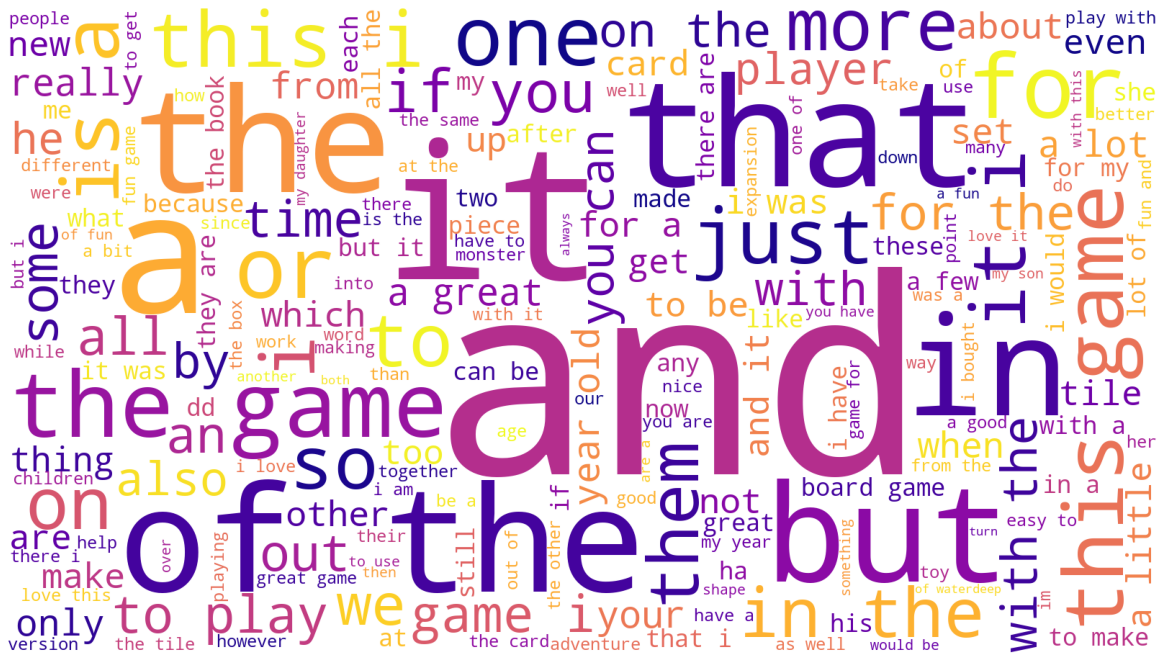

In [667]:
# Plotting the WordCloud image for the review column.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens = []
for i in range(df3_copy.shape[0]):
    all_tokens = all_tokens + df3_copy['tokens_review'][i]

In [668]:
# Creating a word cloud for the summary column.
textt = " ".join(review for review in df3_copy.summary)
wordcloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 10).generate(textt)

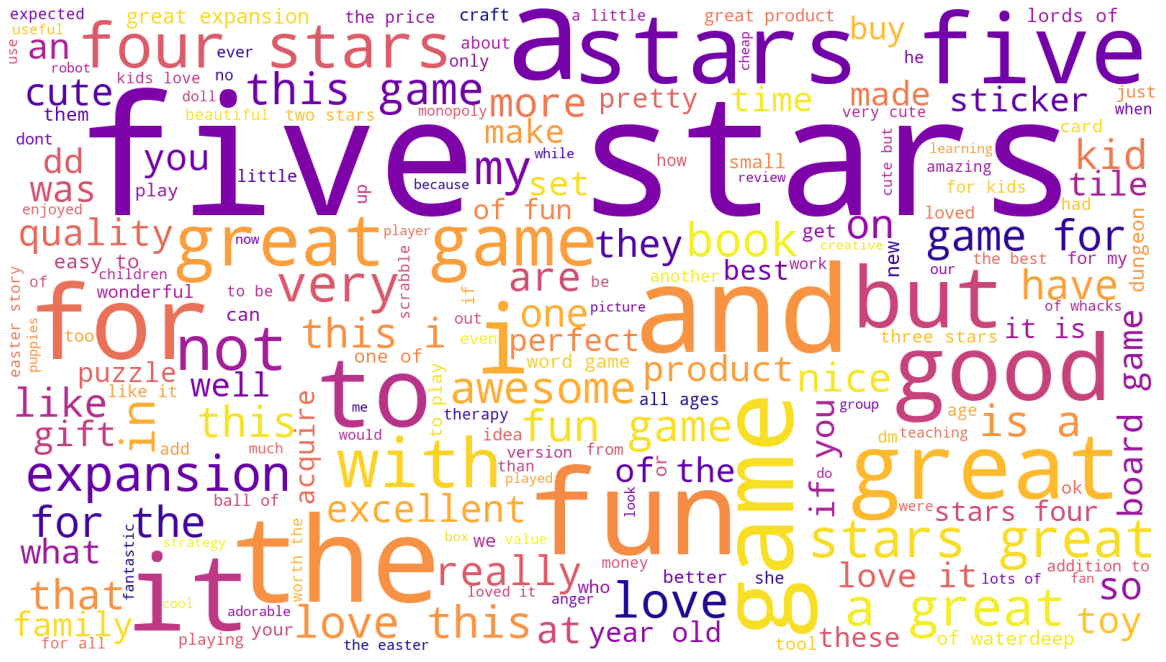

In [669]:
# Plotting the WordCloud image for the summary column.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens = []
for i in range(df3_copy.shape[0]):
    all_tokens = all_tokens + df3_copy['tokens_summary'][i]

### Determining the frequency distribution and polarity.

In [670]:
all_tokens

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [671]:
# Creating the frequency distribution.
fdist = FreqDist(all_tokens)

In [672]:
# Removing alphanumeric characters.
tokens2 = [word for word in all_tokens if word.isalnum()]

In [673]:
# Removing all the stopwords.
english_stopwords = set(stopwords.words('english'))
tokens_2 = [x for x in tokens2 if x.lower() not in english_stopwords]
tokens_2_string = ''
for value in tokens_2:
    tokens_2_string = tokens_2_string + value + ' '

In [674]:
# Creating a WordCloud without stopwords.
wordcloud = WordCloud(width = 1600, height = 900,
                      background_color = 'white',
                      colormap = 'plasma',
                      stopwords = 'none',
                      min_font_size = 5).generate(tokens_2_string)

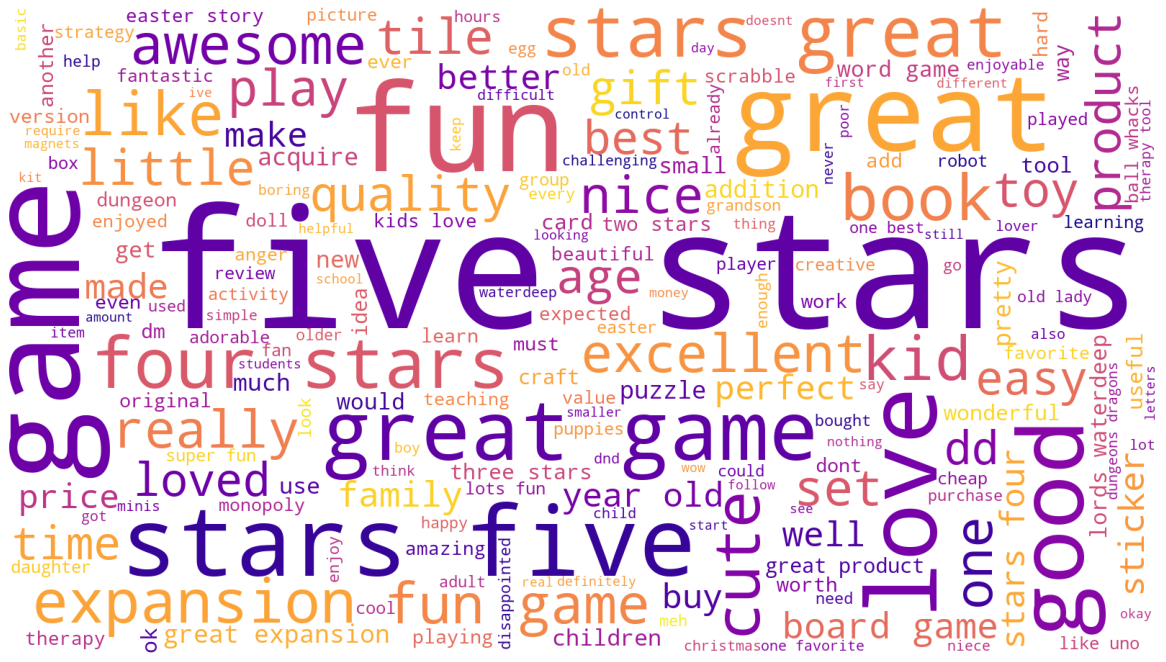

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [675]:
# Plot the wordcloud Image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

fdist1 = FreqDist(tokens_2)
fdist

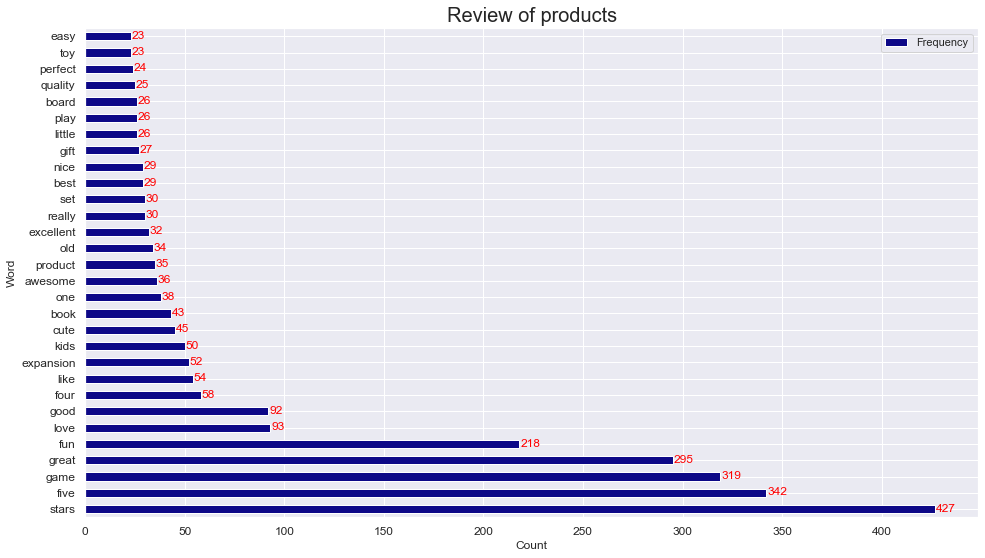

In [676]:
# Identifying 15 most common words and polarity
counts = pd.DataFrame(Counter(tokens_2).most_common(30),
                      columns=['Word', 'Frequency']).set_index('Word')

ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Review of products", fontsize=20)
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### Review sentiment polarity

In [677]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [678]:
# Determing polarity of both columns.
df3_copy['polarity_review'] = df3_copy['review'].apply(generate_polarity)
df3_copy['polarity_summary'] = df3_copy['summary'].apply(generate_polarity)

# View outputs.
df3_copy.head()

,index,review,summary,tokens_review,tokens_summary,polarity_review,polarity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


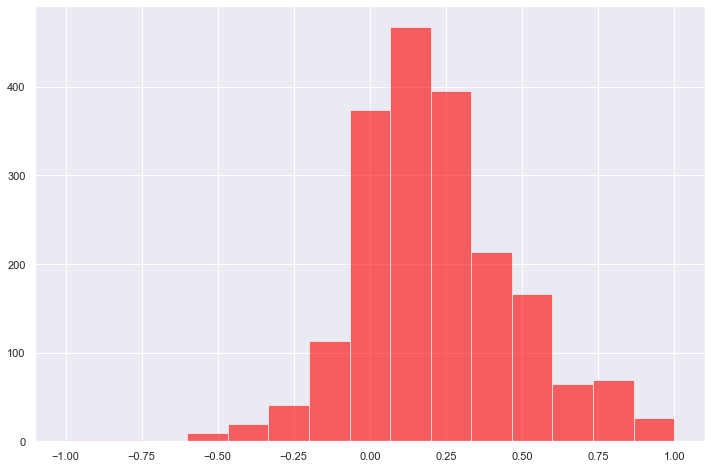

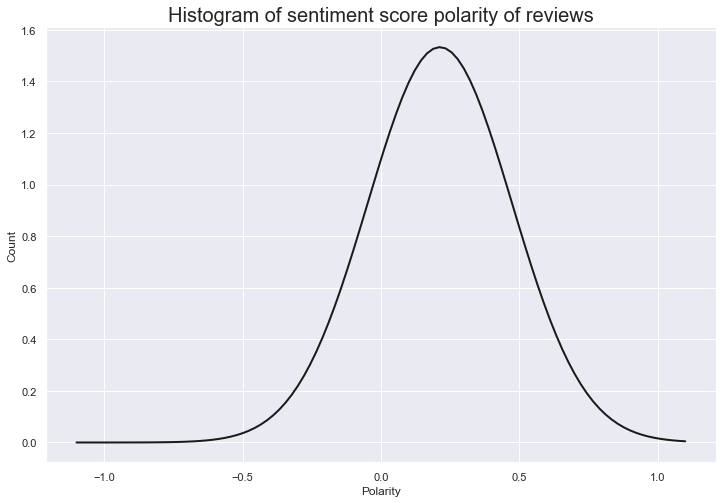

In [583]:
# Creating a histogram with 15 bins for review column.

# Histogram of polarity.
num_bins = 15
plt.hist(df3_copy['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Histogram of sentiment score.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df3_copy['polarity_review'])
p = norm.pdf(x, mu, std)
plt.figure(figsize=(12,8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of reviews', fontsize=20)
plt.show()

#### Comment:
- The histogram indicates that the sentiment score polarity for reviews is negatively skewed (or left skewed). 
- There are more positive reviews than negative reviews.
- There are far more extreme positive reviews than extreme negative reviews.

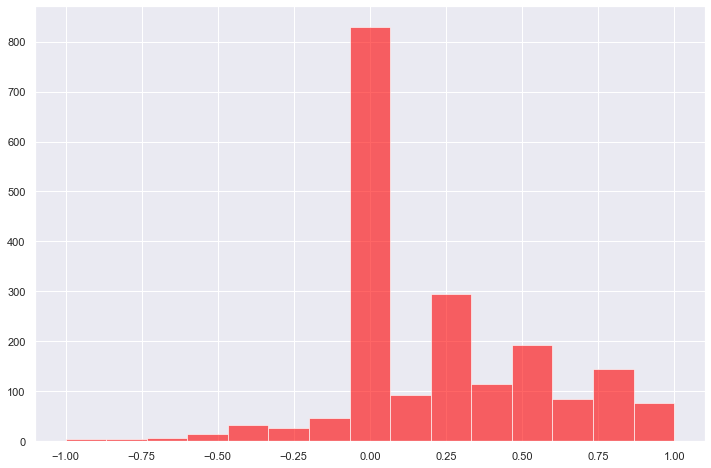

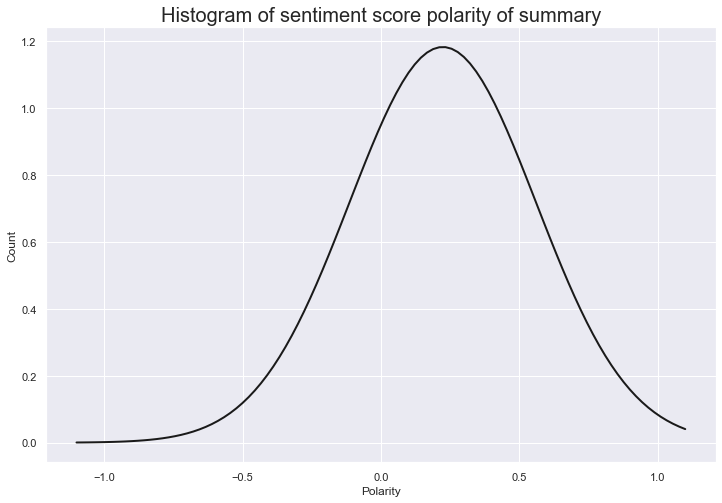

In [680]:
# Creating a histogram plot with 15 bins for the summary column.

# Histogram of polarity.
num_bins = 15
plt.hist(df3_copy['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Histogram of sentiment score.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df3_copy['polarity_summary'])
p = norm.pdf(x, mu, std)
plt.figure(figsize=(12, 8))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of summary', fontsize=20)
plt.show()

#### Comment:
- The skew here is negative/left.
- Summary indicates more neutral reviews than either positive or negative reviews. This maybe due to, for example, sarcasm, not being used in the summaries.
- However, there are more positive reviews than negative reviews.

### Identifying top 20 positive and negative reviews and summaries respectively

In [681]:
# Top 20 negative reviews.
negative_sentiment_review = df3_copy.nsmallest(20, 'polarity_review')
negative_sentiment_review_fin = negative_sentiment_review[['review', 'polarity_review']]
negative_sentiment_review_fin.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
print(negative_sentiment_review_fin)

                                                 review  polarity_review
207   booo unles you are patient know how to measure...        -1.000000
181                   incomplete kit very disappointing        -0.780000
1773  im sorry i just find this product to be boring...        -0.583333
362   one of my staff will be using this game soon s...        -0.550000
116   i bought this as a christmas gift for my grand...        -0.500000
226   this was a gift for my daughter i found it dif...        -0.500000
229                    i found the directions difficult        -0.500000
289              instructions are complicated to follow        -0.500000
300                                           difficult        -0.500000
1501                         expensive for what you get        -0.500000
173   i sent this product to my granddaughter the po...        -0.491667
345   my 8 yearold granddaughter and i were very fru...        -0.446250
531   i purchased this on the recommendation of two

In [682]:
# Top 20 positive reviews.
positive_sentiment_review = df3_copy.nlargest(20, 'polarity_review')
positive_sentiment_review_fin = positive_sentiment_review[['review', 'polarity_review']]
positive_sentiment_review_fin.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
print(positive_sentiment_review_fin)

                                                 review  polarity_review
7                             came in perfect condition              1.0
164                                        awesome book              1.0
193                                        awesome gift              1.0
489   excellent activity for teaching selfmanagement...              1.0
517                         perfect just what i ordered              1.0
583                                   wonderful product              1.0
601                                  delightful product              1.0
613   wonderful for my grandson to learn the resurre...              1.0
782                                             perfect              1.0
923                                             awesome              1.0
1119                                        awesome set              1.0
1150               best set buy 2 if you have the means              1.0
1159               awesome addition to my rpg gm sy

In [683]:
# Top 20 negative summaries.
negative_sentiment_summary = df3_copy.nsmallest(20, 'polarity_summary')
negative_sentiment_summary_fin = negative_sentiment_summary[['summary', 'polarity_summary']]
negative_sentiment_summary_fin.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
print(negative_sentiment_summary_fin)

                                                summary  polarity_summary
21                        the worst value ive ever seen         -1.000000
207    boring unless you are a craft person which i am          -1.000000
819                                              boring         -1.000000
1148  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
143                                        disappointed         -0.750000
623                                        disappointed         -0.750000
785                                        disappointed         -0.750000
1591                                       disappointed         -0.750000
361   promotes anger instead of teaching calming met...         -0.700000
875            too bad this is not what i was expecting         -0.700000
880                        bad qualityall made of paper         -0.700000
177     at age 31 i found these very d

In [684]:
# Top 20 positive summaries.
positive_sentiment_summary = df3_copy.nlargest(20, 'polarity_summary')
positive_sentiment_summary_fin = positive_sentiment_summary[['summary', 'polarity_summary']]
positive_sentiment_summary_fin.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
print(positive_sentiment_summary_fin)

                                               summary  polarity_summary
6                                  best gm screen ever               1.0
28                                   wonderful designs               1.0
32                                             perfect               1.0
80   theyre the perfect size to keep in the car or ...               1.0
133                            perfect for preschooler               1.0
139             awesome sticker activity for the price               1.0
160                                       awesome book               1.0
162                    he was very happy with his gift               1.0
186                                            awesome               1.0
209           awesome and welldesigned for 9 year olds               1.0
412                                            perfect               1.0
468                                          excellent               1.0
536                                          excell

### Final insights and observations

The following insights are insights provided from the word cloud, as well as insights provided from identifying the 15 most common words.
- Top words being used to describe the items sold by Turtle Games are:
    - Game
    - Book
    - Toy
    
- Top words being used to describe the target audience is:
    - Kids
    
- Top words that are used as adjectives to describe the purchased items is:
    - Five stars
    - Fun
    - Love
- Gift is also a word that occurs in the top 15 most common words used. This can be used as a means of advertising to attract new customers.

The insights provided by the word cloud give an indicator as to what items are selling the most. In this case it is games, followed by books and toys. The marketing campaigns can use this information to promote Turtle Games. <br>
<br>
Similarly, from the reviews we can infer that the products from Turtle Games are prodominently being used by kids, or are more popular amongst kids. Hence, marketing campaigns can use this information to attract more of the target audience. <br>

The following insights are provided using results from sentiment polarity histogram, and top 20 positive and negative reviews for the reviews in the review column and the summary column.
   - The histogram for sentiment score polarity in reviews column indicates that there are more positive reviews than negative reviews. This can be used as an overall indication for the company to know how well they're doing.
   - The histogram for the sentiment score polarity for the summary column indicates that there are many more neutral reviews than either positive or negative reviews, however there are still more positive reviews overall than negative reviews. 

The reasoning for this slight difference between the sentiment score for reviews column and the sentiment score for summary may be because the summary column is void of sarcasm, negations, idioms, comparative sentences, tone issues and so on. So this column gives a better indication of the reviews. <br>
<br>
The reviews can provide insight to the game manufacturer and retailer about what they're doing right versus what they need to improve on. So for that reason top 20 positive and negative reviews can be considered important.